In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
map_df = gpd.read_file('../src_data/us_county_mainland/us_county.shp')

In [4]:
case_df = pd.read_csv('covid19-us-counties.csv', dtype={'fips':str})
case_df 

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0.0
1,2020-01-22,Snohomish,Washington,53061,1,0.0
2,2020-01-23,Snohomish,Washington,53061,1,0.0
3,2020-01-24,Cook,Illinois,17031,1,0.0
4,2020-01-24,Snohomish,Washington,53061,1,0.0
...,...,...,...,...,...,...
2502827,2022-05-13,Sweetwater,Wyoming,56037,11088,126.0
2502828,2022-05-13,Teton,Wyoming,56039,10074,16.0
2502829,2022-05-13,Uinta,Wyoming,56041,5643,39.0
2502830,2022-05-13,Washakie,Wyoming,56043,2358,44.0


In [17]:
case_df[case_df['fips'] == '29095']

,date,county,state,fips,cases,deaths
3497,2020-03-17,Jackson,Missouri,29095,2,0.0
4086,2020-03-18,Jackson,Missouri,29095,3,0.0
4805,2020-03-19,Jackson,Missouri,29095,3,0.0
5640,2020-03-20,Jackson,Missouri,29095,5,1.0
6628,2020-03-21,Jackson,Missouri,29095,5,1.0
...,...,...,...,...,...,...
2488090,2022-05-09,Jackson,Missouri,29095,96783,1215.0
2491348,2022-05-10,Jackson,Missouri,29095,96783,1215.0
2494606,2022-05-11,Jackson,Missouri,29095,96783,1215.0
2497864,2022-05-12,Jackson,Missouri,29095,96783,1215.0


In [12]:
case_df[case_df['fips'] .isna()]['county'].unique()

array(['New York City', 'Unknown', 'Kansas City', 'Joplin'], dtype=object)

In [18]:
case_df[case_df['county'] == 'Joplin']

,date,county,state,fips,cases,deaths
272865,2020-06-25,Joplin,Missouri,NaN,103,0.0
276008,2020-06-26,Joplin,Missouri,NaN,113,2.0
279156,2020-06-27,Joplin,Missouri,NaN,113,2.0
282304,2020-06-28,Joplin,Missouri,NaN,113,2.0
285449,2020-06-29,Joplin,Missouri,NaN,140,2.0
...,...,...,...,...,...,...
2488094,2022-05-09,Joplin,Missouri,NaN,13738,219.0
2491352,2022-05-10,Joplin,Missouri,NaN,13738,219.0
2494610,2022-05-11,Joplin,Missouri,NaN,13738,219.0
2497868,2022-05-12,Joplin,Missouri,NaN,13738,219.0


In [20]:
case_df.loc[case_df[case_df['county'] == 'New York City'].index, 'fips'] = '36061'
case_df.loc[case_df[case_df['county'] == 'Kansas City'].index, 'fips'] = '29095'
case_df.loc[case_df[case_df['county'] == 'Joplin'].index, 'fips'] =  '29093'
case_df = case_df[case_df['county'] != 'Unkown']
case_df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0.0
1,2020-01-22,Snohomish,Washington,53061,1,0.0
2,2020-01-23,Snohomish,Washington,53061,1,0.0
3,2020-01-24,Cook,Illinois,17031,1,0.0
4,2020-01-24,Snohomish,Washington,53061,1,0.0
...,...,...,...,...,...,...
2502827,2022-05-13,Sweetwater,Wyoming,56037,11088,126.0
2502828,2022-05-13,Teton,Wyoming,56039,10074,16.0
2502829,2022-05-13,Uinta,Wyoming,56041,5643,39.0
2502830,2022-05-13,Washakie,Wyoming,56043,2358,44.0


In [21]:
case_df[['date','fips','cases']].reset_index(drop = True).to_csv('cleaned_case_data.csv', index = False)

In [10]:
ccase_df = pd.read_csv('cleaned_case_data.csv', dtype={'fips':str})
# ccase_df['year'] = ccase_df['date'].apply(lambda x: int(x[:4]))
# ccase_df['month'] = ccase_df['date'].apply(lambda x: int(x[5:7]))
# ccase_df['day'] = ccase_df['date'].apply(lambda x: int(x[8:]))
ccase_df['yyyy-mm'] = ccase_df['date'].apply(lambda x: x[:7])
ccase_df = ccase_df[['yyyy-mm','fips','cases']].reset_index(drop = True)

In [11]:
year_month = '2020-01'
plot_case_df = ccase_df[ccase_df['yyyy-mm'] == year_month]
plot_case_df = plot_case_df.groupby('fips').sum()['cases'].reset_index()
plot_case_df['cases'].max()

11

(-127.65372665000001, -64.05923634999999, 23.2800329, 50.6274211)

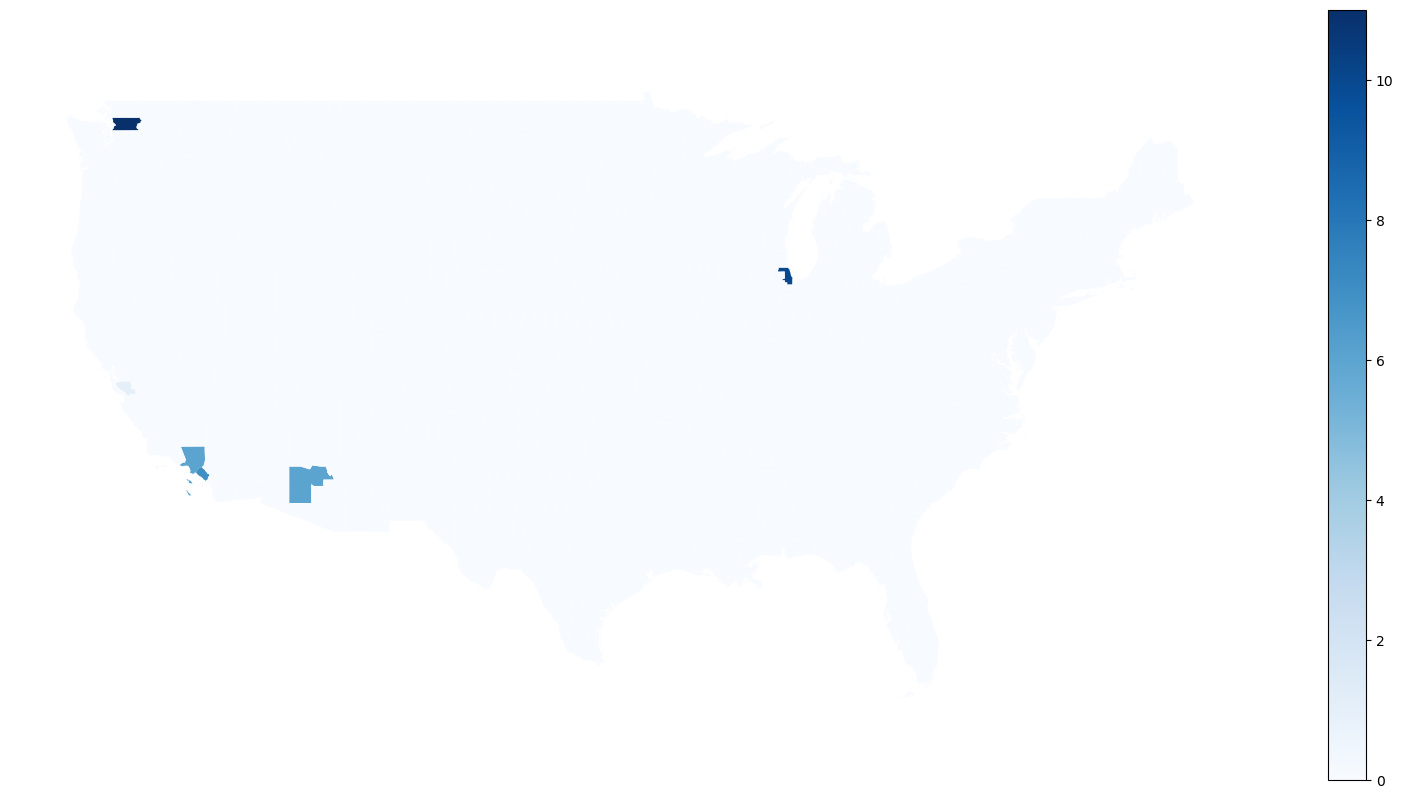

In [5]:
year_month = '2020-01'
plot_case_df = ccase_df[ccase_df['yyyy-mm'] == year_month]
plot_case_df = plot_case_df.groupby('fips').sum()['cases'].reset_index()
prob_map_df = map_df.merge(plot_case_df, left_on='GEOID', right_on='fips', how = 'left').fillna(0)
fig, ax = plt.subplots(figsize = (20,20))
prob_map_df.plot(column='cases', cmap='Blues', ax = ax, linewidth = 0.1, legend=True ,legend_kwds={'shrink': 0.5})
ax.axis('off')
# plt.close(fig)

In [4]:
import matplotlib.animation as animation

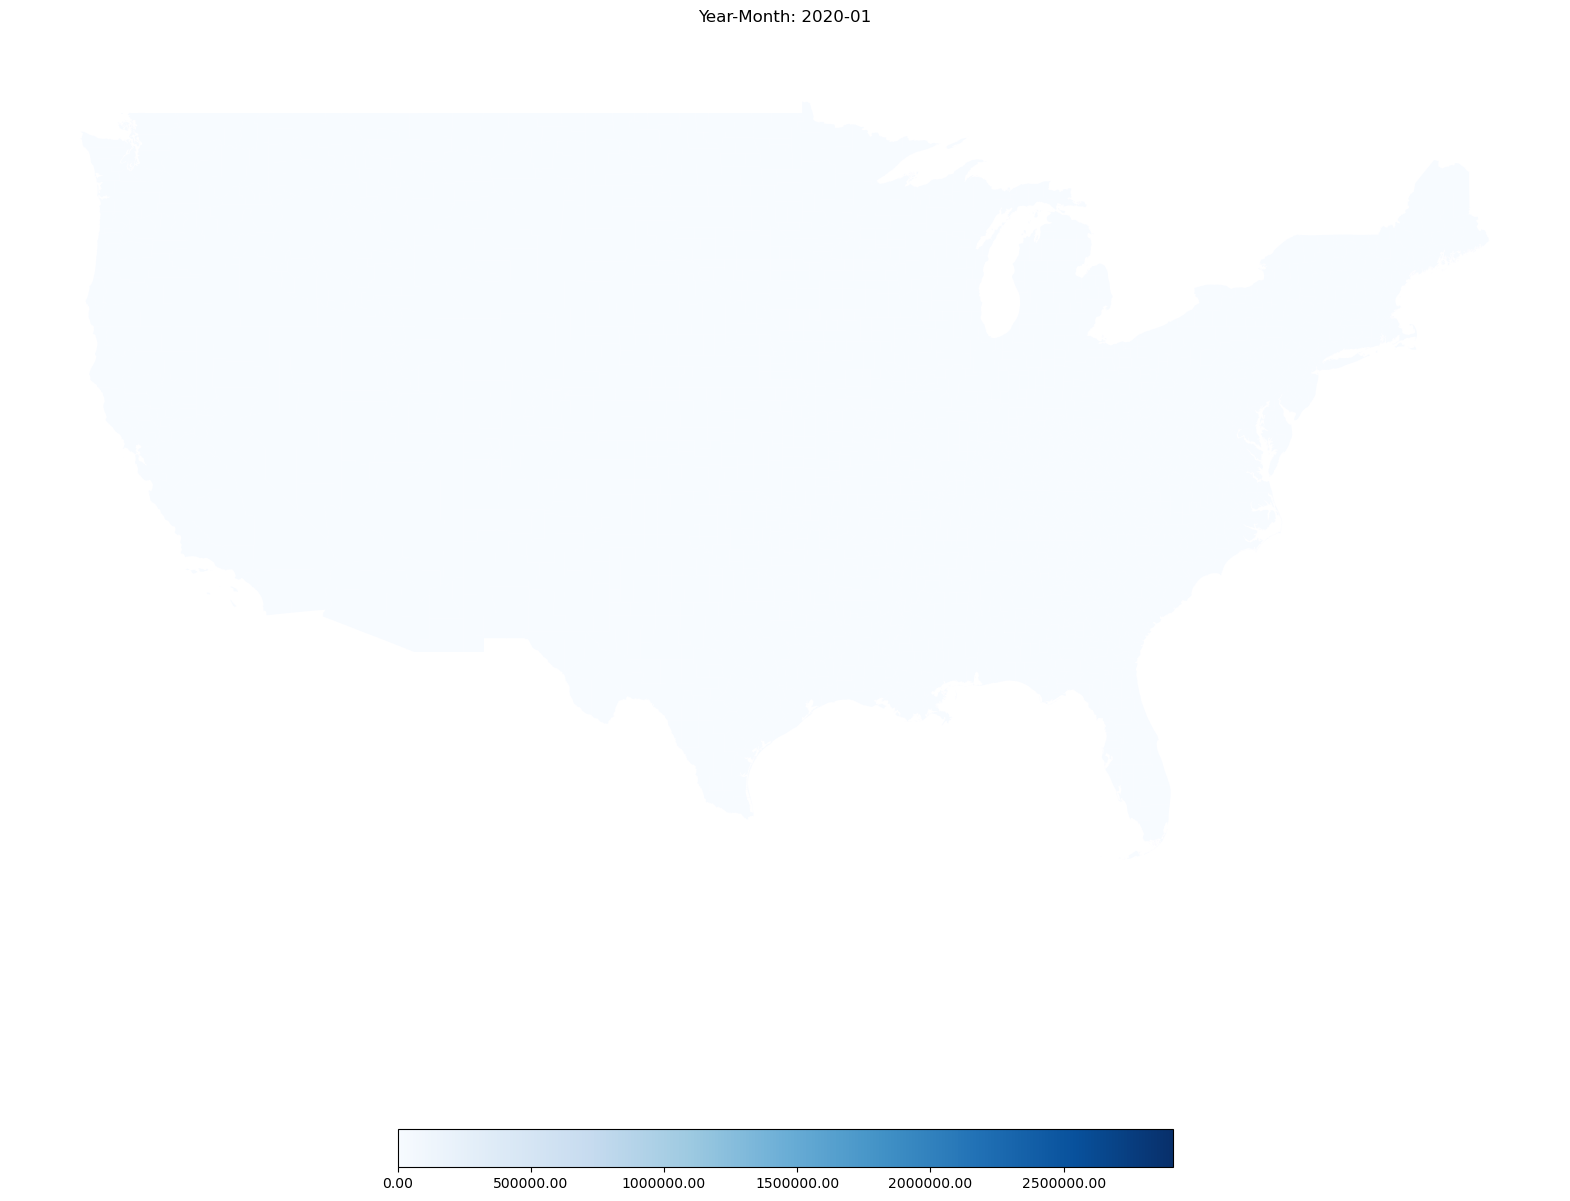

In [13]:
fig, ax = plt.subplots(figsize = (20,20))
years_months = ccase_df['yyyy-mm'].unique()

norm = plt.Normalize(vmin=ccase_df.loc[:, 'cases'].min(), vmax=ccase_df.loc[:, 'cases'].max())
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])  # Only needed for adding the colorbar
colorbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.5, format='%.2f')

def animate(i):
    ax.clear()
    plot_case_df = ccase_df[ccase_df['yyyy-mm'] == years_months[i]]
    plot_case_df = plot_case_df.groupby('fips').sum()['cases'].reset_index()
    prob_map_df = map_df.merge(plot_case_df, left_on='GEOID', right_on='fips', how = 'left').fillna(0)
    prob_map_df.plot(column='cases', cmap='Blues', ax = ax, linewidth = 0.1, legend=False , norm=norm)
    ax.axis('off')
    ax.annotate(f'Year-Month: {years_months[i]}', xy=(0.5, 1.05), xycoords='axes fraction', fontsize=12, ha='center')
ani = animation.FuncAnimation(fig, animate, frames=len(years_months), repeat=False, interval=1000)
ani.save('us_county_cases.mp4', writer='ffmpeg', fps=2)

In [5]:
ccase_df = pd.read_csv('cleaned_case_data.csv', dtype={'fips':str})
ccase_df['yyyy-mm'] = ccase_df['date'].apply(lambda x: x[:7])
ccase_df = ccase_df[['yyyy-mm','fips','cases']].reset_index(drop = True)

In [8]:
county_population_df = pd.read_csv('../src_data/usa_county_population.csv', dtype={'GeoId':str})
ccase_df = ccase_df.join(county_population_df.set_index('GeoId'), on = 'fips', how = 'left')
ccase_df['percent-cases'] = ccase_df['cases']/ccase_df['Population']

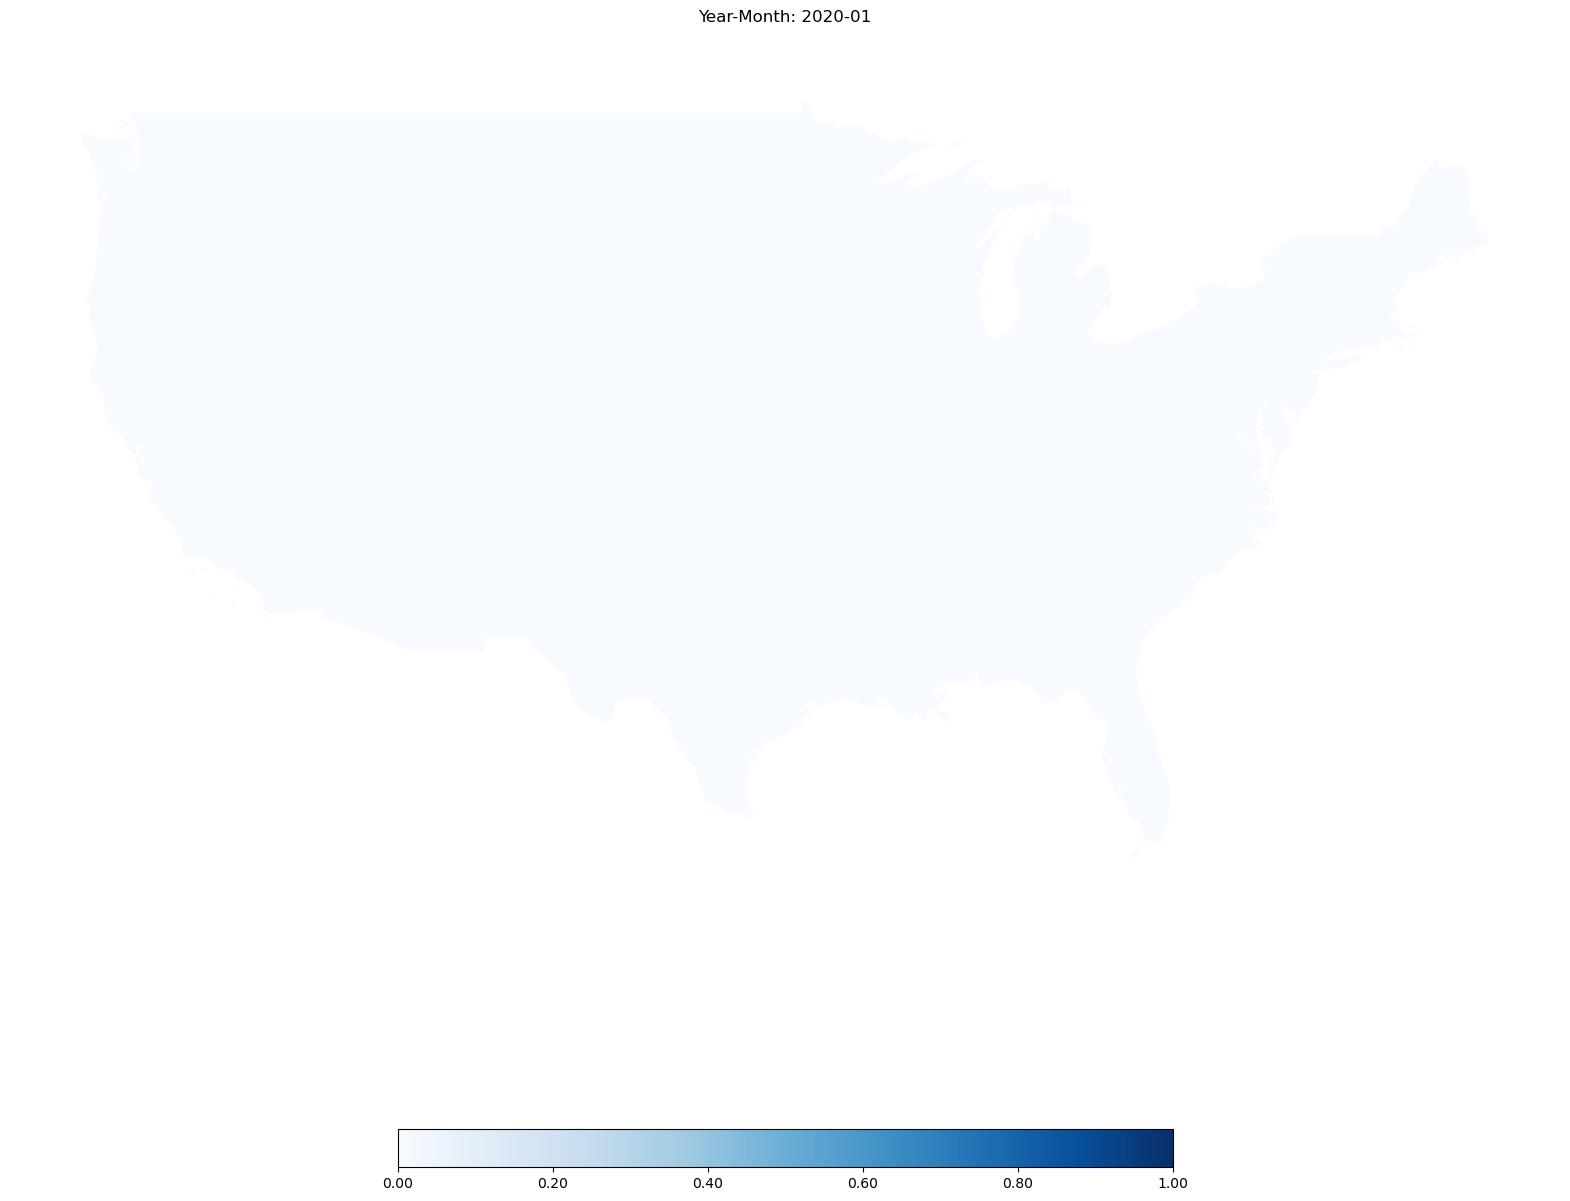

In [10]:
fig, ax = plt.subplots(figsize = (20,20))
years_months = ccase_df['yyyy-mm'].unique()

norm = plt.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])  # Only needed for adding the colorbar
colorbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.5, format='%.2f')

def animate(i):
    ax.clear()
    plot_case_df = ccase_df[ccase_df['yyyy-mm'] == years_months[i]]
    plot_case_df = plot_case_df.groupby('fips').sum()['percent-cases'].reset_index()
    prob_map_df = map_df.merge(plot_case_df, left_on='GEOID', right_on='fips', how = 'left').fillna(0)
    prob_map_df.plot(column='percent-cases', cmap='Blues', ax = ax, linewidth = 0.1, legend=False , norm=norm)
    ax.axis('off')
    ax.annotate(f'Year-Month: {years_months[i]}', xy=(0.5, 1.05), xycoords='axes fraction', fontsize=12, ha='center')
ani = animation.FuncAnimation(fig, animate, frames=len(years_months), repeat=False, interval=1000)
ani.save('us_county_percent_cases.mp4', writer='ffmpeg', fps=2)